# **The Sparks Foundation Tasks**
### Srinivas Natarajan 

---

<br/>

## **Task-2: Prediction using Unsupervised ML**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/gdrive/My Drive/Sparks Foundation/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<br>

#### **Step-1: Checking the number of records and their distribution**
We have a total of 150 values in our data

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<br>

#### **Step-2: Checking for Null values**
It is clear from the output below that there aren't any missing values in the data

In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<br>

#### **Step-3: Using the Elbow method to find the optimal value of K**
We plot the inertia of the K-means model for various values of K and identify the elbow point.

In [6]:
X = data.drop(columns=["Species"])
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


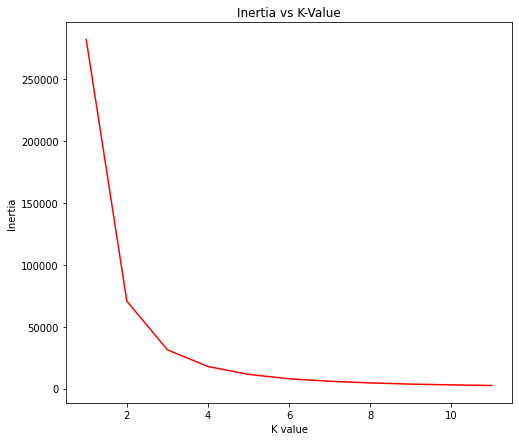

In [7]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1,12):
  kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
  inertia.append(kmeans.inertia_)

plt.figure(figsize = (8,7))
plt.plot(range(1,12), inertia, c='red')
plt.xlabel("K value")
plt.ylabel("Inertia")
plt.title("Inertia vs K-Value")
plt.show()

We can see that the "elbow" in the graph is around K=3

<br>

#### **Step-4: Creating a Kmeans model**
We create the model using K=3

In [8]:
x = data.iloc[:,0]    #Sepal Length
y = data.iloc[:,1]    #Sepal Width

'\n#plt.figure(figsize=(8,6))\nplt.scatter(x, y)\nplt.title("Sepal length vs Sepal Width", fontsize=16)\nplt.xlabel(\'Sepal length\', fontsize=14)\nplt.ylabel(\'Sepal Width\', fontsize=14)\n'

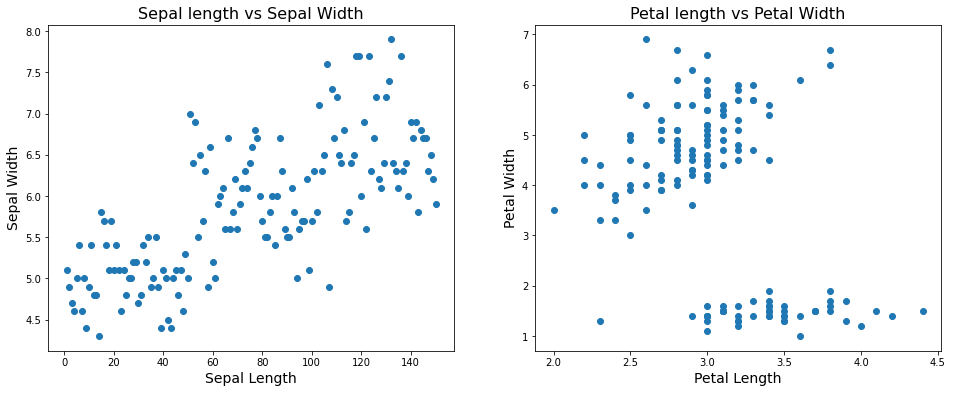

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[0].scatter(x,y)
axes[0].set_xlabel('Sepal Length', fontsize=14)
axes[0].set_ylabel('Sepal Width', fontsize=14)
axes[0].set_title("Sepal length vs Sepal Width", fontsize=16)

axes[1].scatter(data.iloc[:,2], data.iloc[:,3])
axes[1].set_xlabel('Petal Length', fontsize=14)
axes[1].set_ylabel('Petal Width', fontsize=14)
axes[1].set_title("Petal length vs Petal Width", fontsize=16)

"""
#plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.title("Sepal length vs Sepal Width", fontsize=16)
plt.xlabel('Sepal length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
"""

In [10]:
km = KMeans(n_clusters = 3, random_state=42)
km.fit(X)
centers = np.array(km.cluster_centers_)

print("The centers of the clusters are: \n")
for c in centers:
  print("(%f , %f, %f, %f)"%(c[0],c[1],c[2],c[3]))

The centers of the clusters are: 

(125.500000 , 6.588000, 2.974000, 5.552000)
(25.500000 , 5.006000, 3.418000, 1.464000)
(75.500000 , 5.936000, 2.770000, 4.260000)


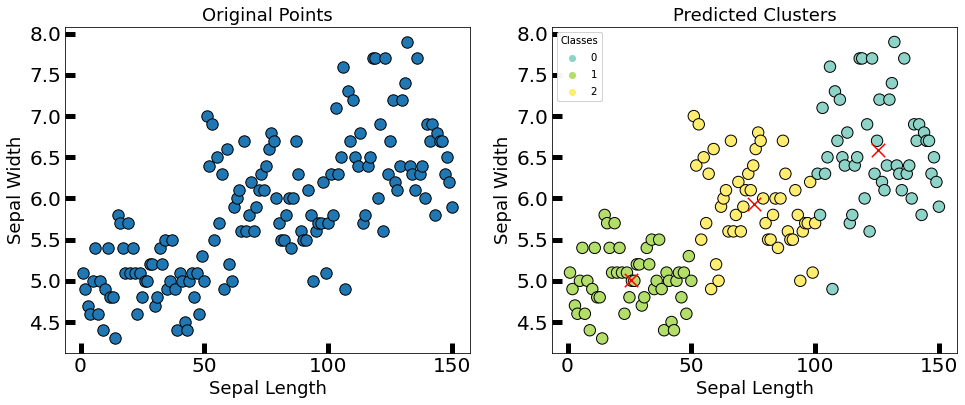

In [15]:
new_labels = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[0].scatter(x, y, cmap='Set1', edgecolor='k', s=130)
axes[0].set_xlabel('Sepal Length', fontsize=18)
axes[0].set_ylabel('Sepal Width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Original Points', fontsize=18)


scatter = axes[1].scatter(x, y, c=new_labels, cmap='Set3', edgecolor='k', s=130)
axes[1].set_xlabel('Sepal Length', fontsize=18)
axes[1].set_ylabel('Sepal Width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Predicted Clusters', fontsize=18)


legend1 = axes[1].legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
axes[1].add_artist(legend1)


plt.scatter(centers[:,0], centers[:,1], marker="x", color='r', s=180, label = "Centers")